In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import shap
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv("/content/Employee_Attrition dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print("Dataset shape:", df.shape)
print("\nInfo:\n")
df.info()

print("\nMissing values:\n")
print(df.isnull().sum())

print("\nAttrition distribution:\n")
print(df['Attrition'].value_counts())

Dataset shape: (1470, 35)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   in

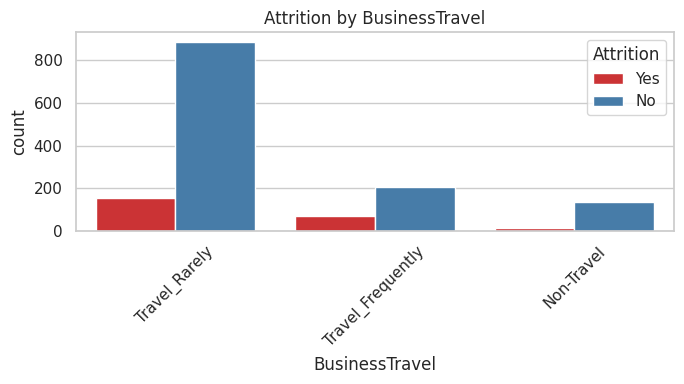

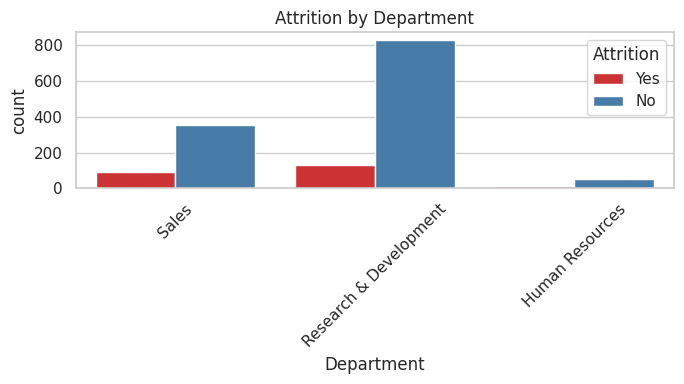

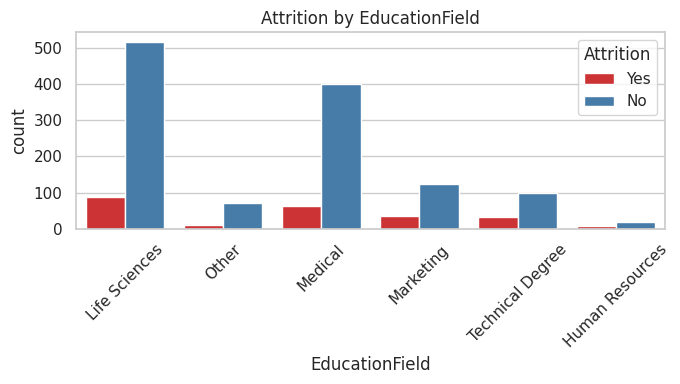

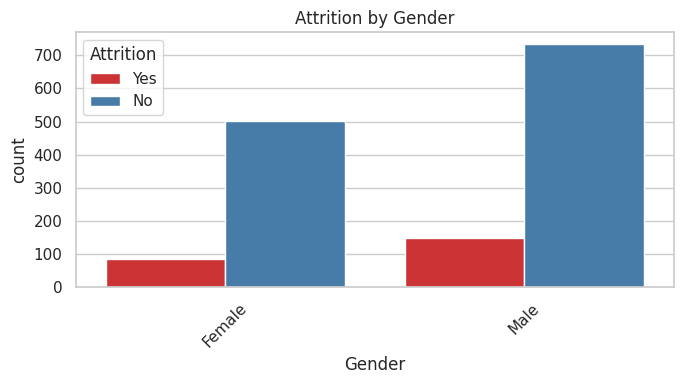

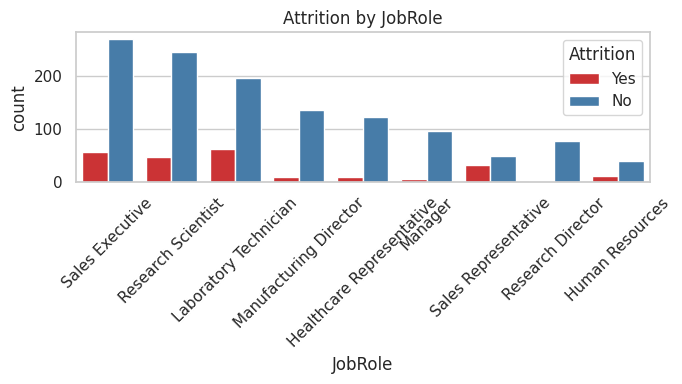

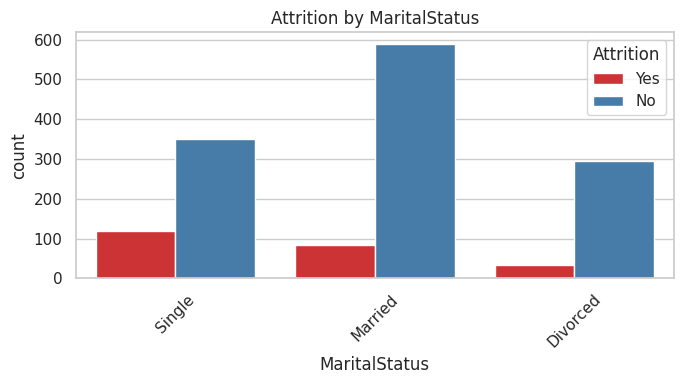

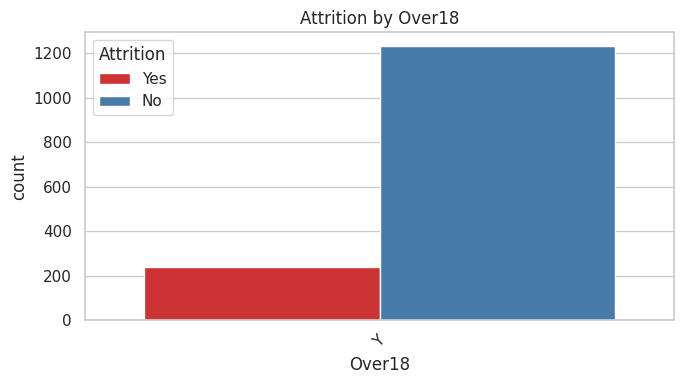

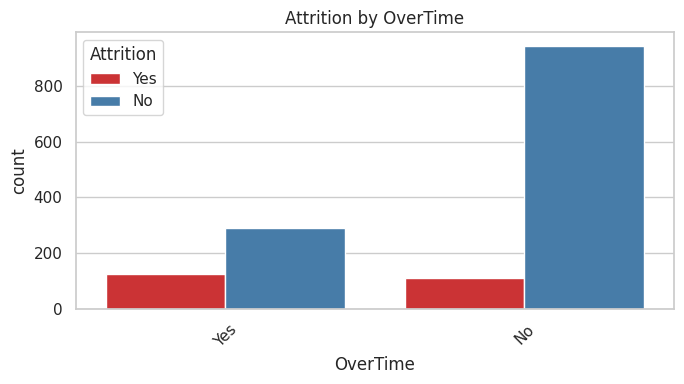

In [ ]:
cat_features = df.select_dtypes(include='object').columns
for col in cat_features[1:]:  # skip Attrition
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set1')
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

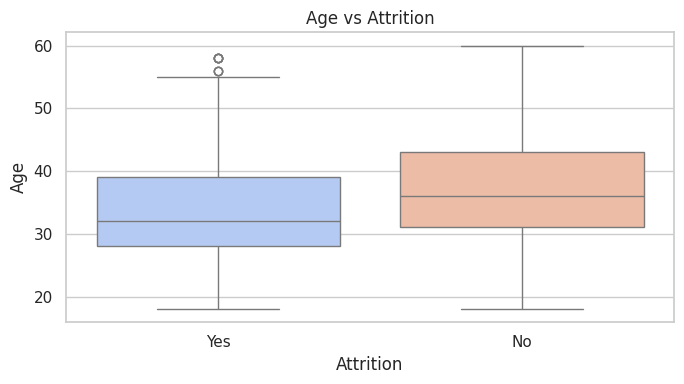

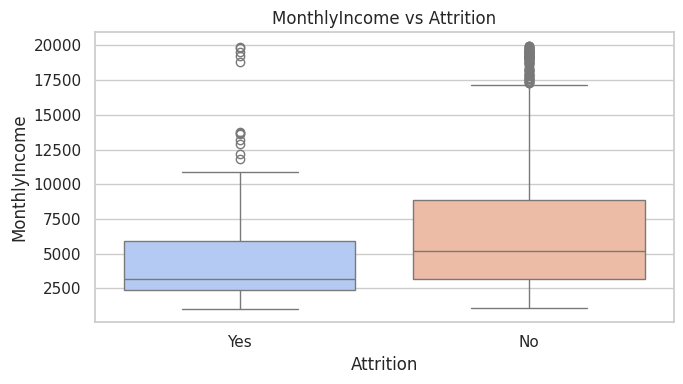

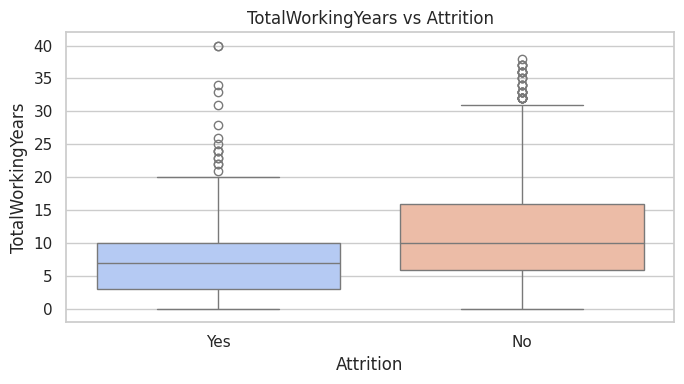

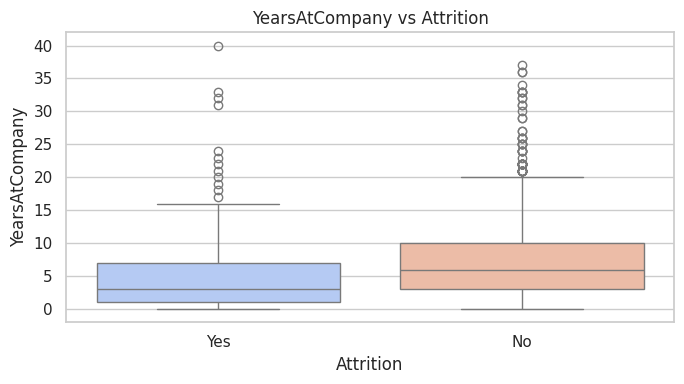

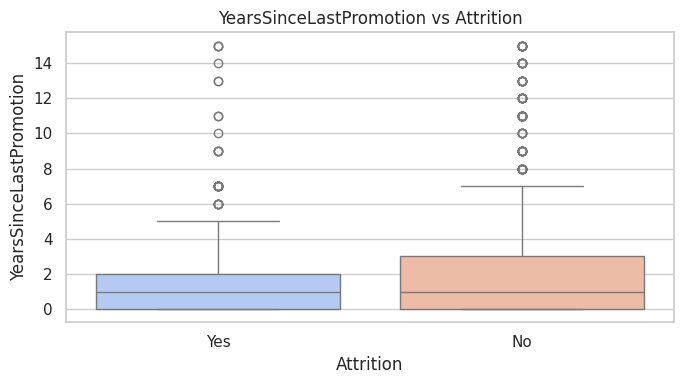

In [ ]:
num_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')
    plt.title(f"{col} vs Attrition")
    plt.tight_layout()
    plt.show()

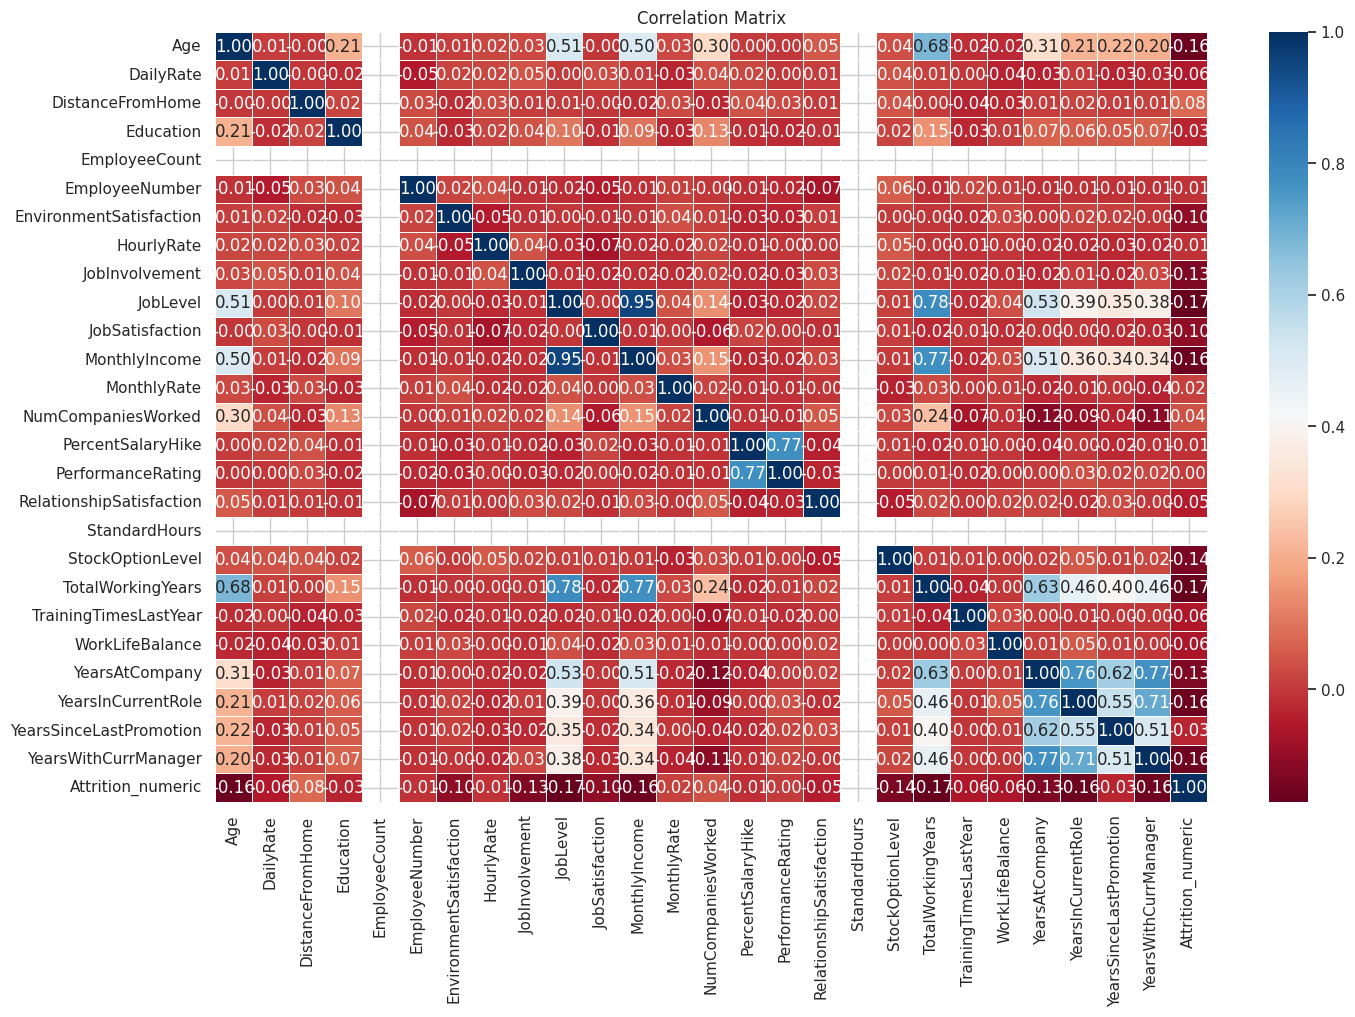

In [ ]:
plt.figure(figsize=(16,10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Drop irrelevant columns
df_cleaned = df.drop(['EmployeeNumber', 'StandardHours', 'EmployeeCount', 'Over18'], axis=1)

# Encode target variable
df_cleaned['Attrition'] = df_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
            'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00        61

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix:
 [[380   0]
 [  0  61]]
ROC AUC Score: 1.0


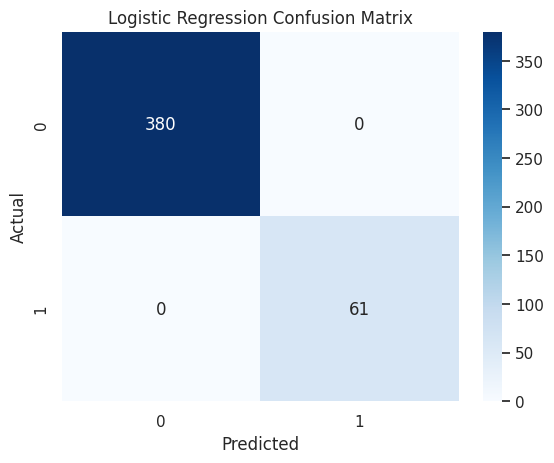

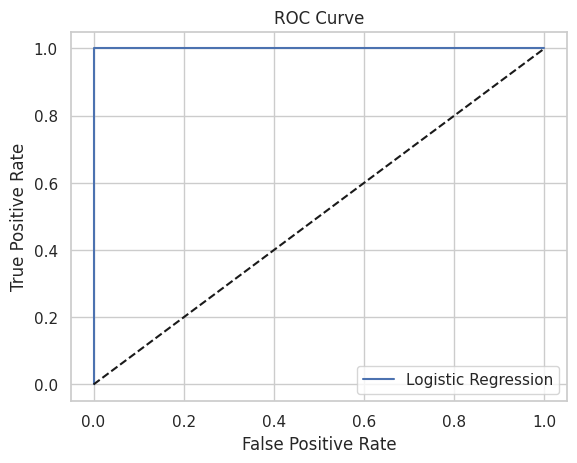

In [ ]:
y_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_lr))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00        61

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix:
 [[380   0]
 [  0  61]]
ROC AUC Score: 1.0


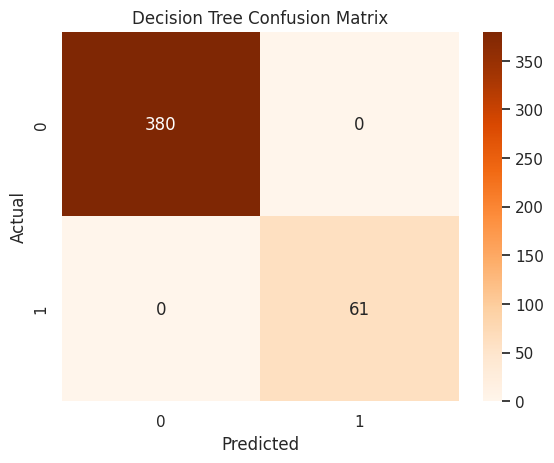

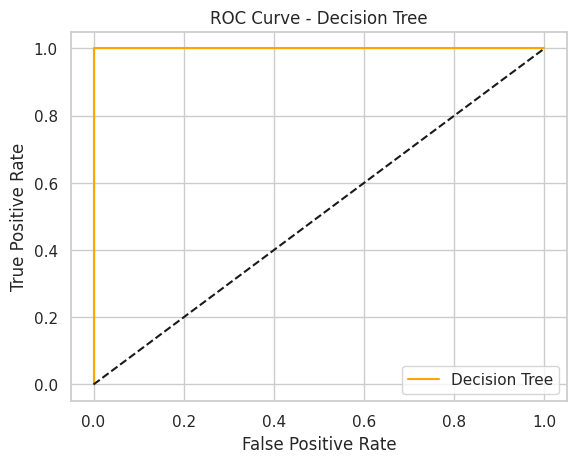

In [ ]:
# Predict using Decision Tree
y_pred_tree = model_tree.predict(X_test)
y_pred_prob_tree = model_tree.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_tree))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


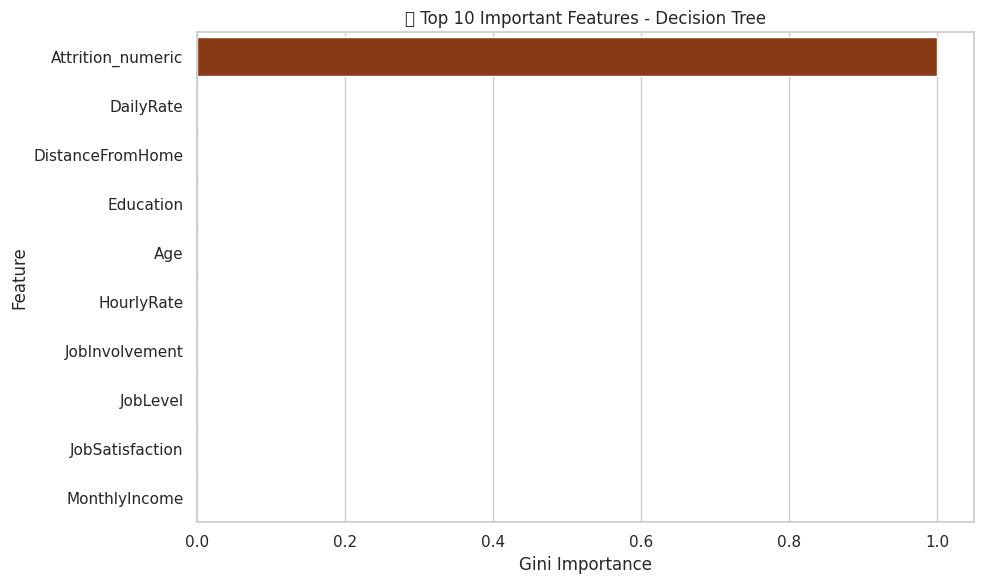

In [ ]:
# Get feature importance values
tree_importances = model_tree.feature_importances_

# Create DataFrame
tree_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_importances
})

# Sort and get top 10
top_tree = tree_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_tree, palette='Oranges_r')
plt.title('🌲 Top 10 Important Features - Decision Tree')
plt.xlabel('Gini Importance')
plt.tight_layout()
plt.show()

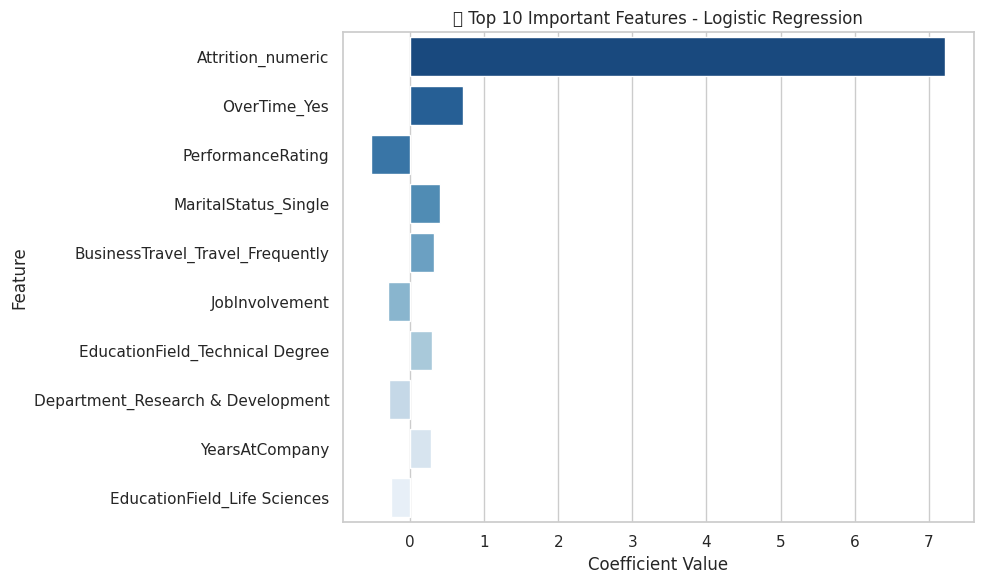

In [ ]:
# Get feature names and coefficients
coef = model_lr.coef_[0]
features = X_train.columns

# Create DataFrame of coefficients
lr_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coef
})

# Sort by absolute value of coefficients
lr_importance['Abs_Importance'] = lr_importance['Importance'].abs()
top_lr = lr_importance.sort_values(by='Abs_Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_lr, palette='Blues_r')
plt.title('🔹 Top 10 Important Features - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.to_csv('hr_cleaned.csv', index=False)

In [ ]:
!pip install shap

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns

# Use LabelEncoder or OneHotEncoder
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# 4. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)


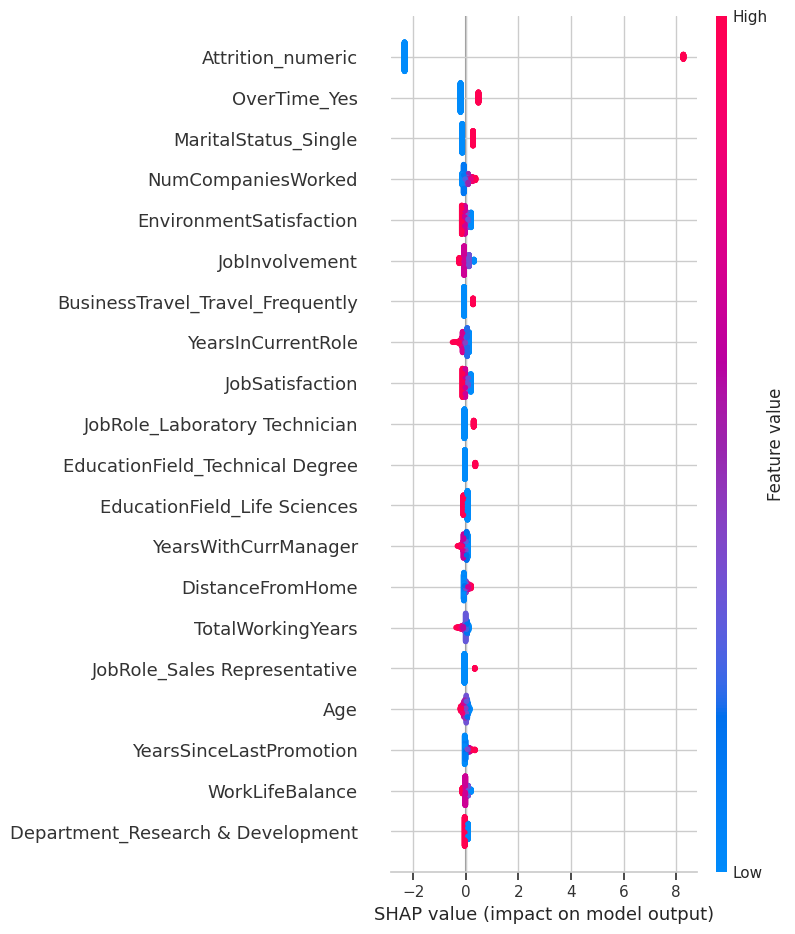

In [ ]:
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Train model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# SHAP analysis
explainer = shap.Explainer(model_lr, X_train)
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)

plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_logreg_summary.png", bbox_inches='tight')
plt.close()

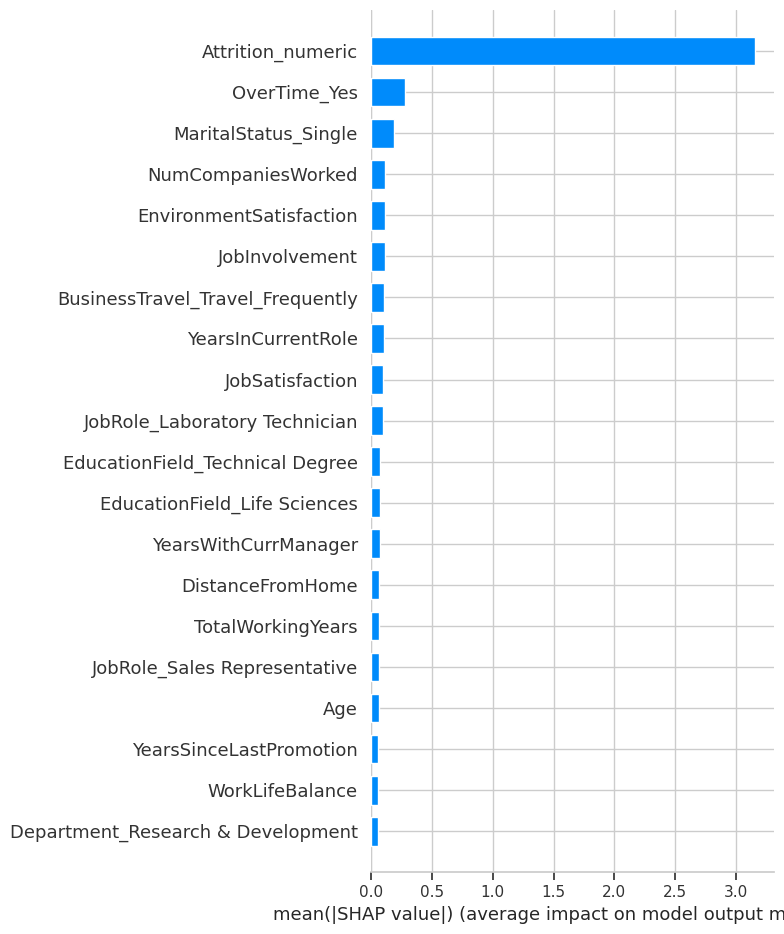

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.savefig("shap_bar_logreg_v2.png", bbox_inches='tight')
plt.close()

In [ ]:
import joblib
joblib.dump(model_tree, "attrition_model1.pkl")

import joblib
joblib.dump(model_lr, "attrition_model2.pkl")

['attrition_model2.pkl']